# Доверительные интервалы для доли 

## Генерация данных

In [6]:
import numpy as np

In [2]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [3]:
#истинное значение доли
statistical_population.mean()

0.49770999999999999

## Точечная оценка доли

In [4]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [5]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [6]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [7]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0])

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [8]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [9]:
print 'wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0])

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [4]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [11]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [12]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [13]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [14]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0])

normal_interval [0.481776, 0.501773] with width 0.019997


In [1]:
from statsmodels.stats.proportion import proportion_confint

In [2]:
proportion_confint(1, 50)

(-0.018805307081790987, 0.058805307081790992)

In [3]:
proportion_confint(1, 50, method='wilson')

(0.0035392592716462362, 0.10495443589637815)

In [7]:
int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))

753

In [11]:
parts = np.arange(0.005, 0.9, 0.005)
parts

array([ 0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,
        0.045,  0.05 ,  0.055,  0.06 ,  0.065,  0.07 ,  0.075,  0.08 ,
        0.085,  0.09 ,  0.095,  0.1  ,  0.105,  0.11 ,  0.115,  0.12 ,
        0.125,  0.13 ,  0.135,  0.14 ,  0.145,  0.15 ,  0.155,  0.16 ,
        0.165,  0.17 ,  0.175,  0.18 ,  0.185,  0.19 ,  0.195,  0.2  ,
        0.205,  0.21 ,  0.215,  0.22 ,  0.225,  0.23 ,  0.235,  0.24 ,
        0.245,  0.25 ,  0.255,  0.26 ,  0.265,  0.27 ,  0.275,  0.28 ,
        0.285,  0.29 ,  0.295,  0.3  ,  0.305,  0.31 ,  0.315,  0.32 ,
        0.325,  0.33 ,  0.335,  0.34 ,  0.345,  0.35 ,  0.355,  0.36 ,
        0.365,  0.37 ,  0.375,  0.38 ,  0.385,  0.39 ,  0.395,  0.4  ,
        0.405,  0.41 ,  0.415,  0.42 ,  0.425,  0.43 ,  0.435,  0.44 ,
        0.445,  0.45 ,  0.455,  0.46 ,  0.465,  0.47 ,  0.475,  0.48 ,
        0.485,  0.49 ,  0.495,  0.5  ,  0.505,  0.51 ,  0.515,  0.52 ,
        0.525,  0.53 ,  0.535,  0.54 ,  0.545,  0.55 ,  0.555,  0.56 ,
      

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

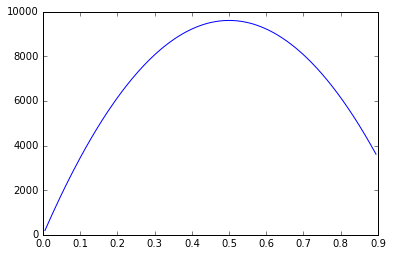

In [12]:
y = [int(np.ceil(samplesize_confint_proportion(p, 0.01))) for p in parts]
plt.plot(parts, y)

In [13]:
max(y)

9604

In [14]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [16]:
import scipy

In [24]:

z = scipy.stats.norm.ppf(1 - 0.05 / 2.) 
p2 = 104.0 / 11037
p1 = 189.0 / 11034

left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ 11037 + p2 * (1 - p2)/ 11037)
right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ 11034 + p2 * (1 - p2)/ 11034)
(left_boundary, right_boundary)

(0.0046880146053466494, 0.010724443597377873)

In [22]:
right_boundary*100

0.0028244159304810367

In [25]:
(p1/(1-p1)) / (p2/(1-p2))

1.8320539419087138

In [33]:
data = [1]*104
data += [0]*(11037-104)
data = np.array(data)

In [37]:
np.random.seed(0)
indices = np.random.randint(0, len(data), (1000, len(data)))
samples = data[indices]
samples[5, 100:150]b

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [39]:
data2 = [1]*189
data2 += [0]*(11034-189)
data2 = np.array(data2)

np.random.seed(0)
indices2 = np.random.randint(0, len(data2), (1000, len(data2)))
samples2 = data2[indices2]
samples2[5, 100:150]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [40]:
def shans(x):
    p = float(sum(x)) / len(x)
    return p / (1 - p)

In [41]:
np.random.seed(0)

shans_scor1 = map(shans, samples)
shans_scor2 = map(shans, samples2)

delta_shans_scores = map(lambda x: x[1]/x[0], zip(shans_scor1, shans_scor2))
delta_shans_scores[:3]

[1.7801030408522565, 1.747215348890327, 1.9866872161335498]

In [42]:
np.percentile(delta_shans_scores, [100 * 0.05 / 2., 100 * (1 - 0.05 / 2.)])

array([ 1.63035462,  2.10397776])